In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [8]:
df=pd.read_csv('chatgpt.csv')

In [9]:
df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['labels'] = encoder.fit_transform(df['labels'])

In [12]:
df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,2
1,1,"Try talking with ChatGPT, our new AI system wh...",1
2,2,ChatGPT: Optimizing Language Models for Dialog...,2
3,3,"THRILLED to share that ChatGPT, our new model ...",1
4,4,"As of 2 minutes ago, @OpenAI released their ne...",0


In [13]:
df=df[(df['labels']==1) | (df['labels']==0)]

In [14]:
df.head()

,Unnamed: 0,tweets,labels
1,1,"Try talking with ChatGPT, our new AI system wh...",1
3,3,"THRILLED to share that ChatGPT, our new model ...",1
4,4,"As of 2 minutes ago, @OpenAI released their ne...",0
5,5,"Just launched ChatGPT, our new AI system which...",1
6,6,"As of 2 minutes ago, @OpenAI released their ne...",0


In [15]:
df.shape

(163807, 3)

<Axes: xlabel='labels', ylabel='count'>

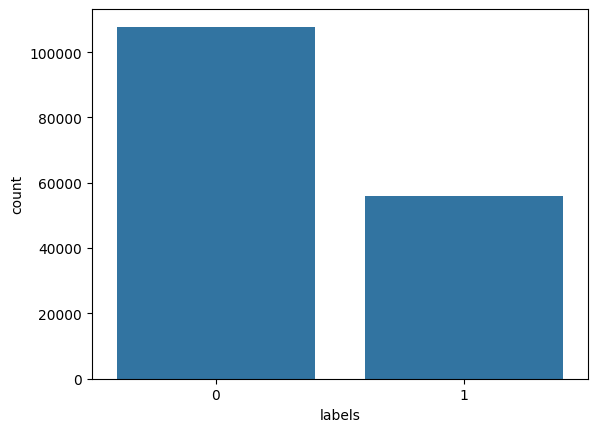

In [16]:
sns.countplot(x='labels', data= df)

In [17]:
df['length'] = df['tweets'].apply(lambda x: len(x))

In [18]:
df.head()

,Unnamed: 0,tweets,labels,length
1,1,"Try talking with ChatGPT, our new AI system wh...",1,139
3,3,"THRILLED to share that ChatGPT, our new model ...",1,188
4,4,"As of 2 minutes ago, @OpenAI released their ne...",0,139
5,5,"Just launched ChatGPT, our new AI system which...",1,142
6,6,"As of 2 minutes ago, @OpenAI released their ne...",0,171


In [19]:
import string

In [20]:
df['nopunc'] = df['tweets'].apply(lambda x: [a for a in x if a not in string.punctuation])

In [21]:
df['nopunc'] =df['nopunc'].apply(''.join)

In [22]:
df.head()

,Unnamed: 0,tweets,labels,length,nopunc
1,1,"Try talking with ChatGPT, our new AI system wh...",1,139,Try talking with ChatGPT our new AI system whi...
3,3,"THRILLED to share that ChatGPT, our new model ...",1,188,THRILLED to share that ChatGPT our new model o...
4,4,"As of 2 minutes ago, @OpenAI released their ne...",0,139,As of 2 minutes ago OpenAI released their new ...
5,5,"Just launched ChatGPT, our new AI system which...",1,142,Just launched ChatGPT our new AI system which ...
6,6,"As of 2 minutes ago, @OpenAI released their ne...",0,171,As of 2 minutes ago OpenAI released their new ...


In [23]:
X=df['nopunc']
y=df['labels']

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [25]:
X=cv.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [28]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [29]:
nb.fit(X_train,y_train)

MultinomialNB()

In [30]:
pred=nb.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     32367
           1       0.82      0.92      0.87     16776

    accuracy                           0.91     49143
   macro avg       0.89      0.91      0.90     49143
weighted avg       0.91      0.91      0.91     49143



In [33]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [34]:
from sklearn.pipeline import Pipeline

In [35]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [36]:
X=df['nopunc']
y=df['labels']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [38]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [39]:
y_pred = pipeline.predict(X_test)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     32367
           1       0.97      0.56      0.71     16776

    accuracy                           0.84     49143
   macro avg       0.89      0.77      0.80     49143
weighted avg       0.87      0.84      0.83     49143

